In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from sklearn.linear_model import LinearRegression

In [2]:
xls = pd.ExcelFile('../../data/WorldEnergyBalancesHighlights_final.xlsx')

In [3]:
df_countries = pd.read_excel(xls, 'TimeSeries_1971-2019',header=1,index_col=[0,1,2],usecols="A:C,Z:BB",na_values=['..','c'])
df_countries

1990  \
Country                                 Product                  Flow                                                    
Australia                               Coal, peat and oil shale Production (ktoe)                        1.061030e+05   
                                                                 Imports (ktoe)                           0.000000e+00   
                                                                 Exports (ktoe)                          -6.726662e+04   
                                                                 Total energy supply (ktoe)               3.488774e+04   
                                                                 Electricity, CHP and heat plants (ktoe) -2.892349e+04   
...                                                                                                                ...   
IEA and Accession/Association countries Total                    Electricity output (GWh)                 9.046845e+06   
World                                   Fossil fuels             Electricity output (GWh)                 7.501510e+06   
                                        Nuclear                  Electricity output (GWh)                 2.012902e+06   
                                        Renewable sources        Electricity output (GWh)                 2.296008e+06   
                                        Total                    Electricity output (GWh)                 1.184619e+07   

                                                                                                                  1991  \
Country                                 Product                  Flow                                                    
Australia                               Coal, peat and oil shale Production (ktoe)                        1.147629e+05   
                                                                 Imports (ktoe)                           0.000000e+00   
                                                                 Exports (ktoe)                          -7.821431e+04   
                                                                 Total energy supply (ktoe)               3.627799e+04   
                                                                 Electricity, CHP and heat plants (ktoe) -2.994731e+04   
...                                                                                                                ...   
IEA and Accession/Association countries Total                    Electricity output (GWh)                 9.328546e+06   
World                                   Fossil fuels             Electricity output (GWh)                 7.635090e+06   
                                        Nuclear                  Electricity output (GWh)                 2.105787e+06   
                                        Renewable sources        Electricity output (GWh)                 2.331754e+06   
                                        Total                    Electricity output (GWh)                 1.211372e+07   

                                                                                                                  1992  \
Country                                 Product                  Flow                                                    
Australia                               Coal, peat and oil shale Production (ktoe)                        1.191394e+05   
                                                                 Imports (ktoe)                           0.000000e+00   
                                                                 Exports (ktoe)                          -8.201214e+04   
                                                                 Total energy supply (ktoe)               3.683188e+04   
                                                                 Electricity, CHP and heat plants (ktoe) -3.072018e+04   
...                                                                                   

In [4]:
br = df_countries.loc[('Brazil')]
br

1990  \
Product                  Flow                                                   
Coal, peat and oil shale Production (ktoe)                          1931.4685   
                         Imports (ktoe)                             7904.0236   
                         Exports (ktoe)                                0.0000   
                         Total energy supply (ktoe)                 9671.0042   
                         Electricity, CHP and heat plants (ktoe)   -1502.8617   
...                                                                       ...   
Total                    Other final consumption (ktoe)            15829.1115   
Fossil fuels             Electricity output (GWh)                  10017.0000   
Nuclear                  Electricity output (GWh)                   2237.0000   
Renewable sources        Electricity output (GWh)                 210567.0000   
Total                    Electricity output (GWh)                 222821.0000   

                                                                         1991  \
Product                  Flow                                                   
Coal, peat and oil shale Production (ktoe)                          2115.3928   
                         Imports (ktoe)                             8701.2099   
                         Exports (ktoe)                                0.0000   
                         Total energy supply (ktoe)                11056.9885   
                         Electricity, CHP and heat plants (ktoe)   -1730.6859   
...                                                                       ...   
Total                    Other final consumption (ktoe)            15296.4559   
Fossil fuels             Electricity output (GWh)                  11154.0000   
Nuclear                  Electricity output (GWh)                   1442.0000   
Renewable sources        Electricity output (GWh)                 221781.0000   
Total                    Electricity output (GWh)                 234377.0000   

                                                                         1992  \
Product                  Flow                                                   
Coal, peat and oil shale Production (ktoe)                          1886.5141   
                         Imports (ktoe)                             8376.9024   
                         Exports (ktoe)                               -3.9900   
                         Total energy supply (ktoe)                10701.7580   
                         Electricity, CHP and heat plants (ktoe)   -1736.8784   
...                                                                       ...   
Total                    Other final consumption (ktoe)            15591.3750   
Fossil fuels             Electricity output (GWh)                  11731.0000   
Nuclear                  Electricity output (GWh)                   1759.0000   
Renewable sources        Electricity output (GWh)                 228242.0000   
Total                    Electricity output (GWh)                 241732.0000   

                                                                         1993  \
Product                  Flow                                                   
Coal, peat and oil shale Production (ktoe)                          1832.8766   
                         Imports (ktoe)                             8881.1814   
                         Exports (ktoe)                                0.0000   
                         Total energy supply (ktoe)                11010.8661   
                         Electricity, CHP and heat plants (ktoe)   -1656.4288   
...                                                                       ...   
Total                    Other final consumption (ktoe)            16011.7609   
Fossil fuels             Electricity output (GWh)                  11515.0000   
Nuclear                  Electricity output (GWh)                    442.0000   
Renewable sources   

In [5]:
def simply_train(df,label):
    lm = LinearRegression(normalize=True)
    x = df[label].index
    y = df[label]
    lm.fit(x.values.reshape(-1,1),y)
    return lm

def predict_future(lm,df,label):
    cols_predict =[2019,2020,2021,2022]
    predictModel =  lm.predict(np.array(cols_predict).reshape(-1, 1))
    predict = pd.Series(data=predictModel,index=cols_predict)
    real = df[label]
    predict[2018] = real[2018]
    predict = predict.sort_index(axis=0)
    return predict, real


def predict_data(df,label):
    df = df.transpose()
    lm = simply_train(df,label)

    print(f"Modelo Previsto de {label} x Modelo Original")
    predictModel = lm.predict(np.array(df[label].index.tolist()).reshape(-1, 1))
    pd.Series(data=predictModel,index=df[label].index).plot()
    df[label].plot()
    plt.show()

    print(f"Modelo Original como previsão de 4 anos no futuro")
    predict, real = predict_future(lm,df,label)
    predict.plot()
    real.plot()
    plt.show()

### Predizendo produção de energia renovavel nos proximos 4 anos

Modelo Previsto de Electricity output (GWh) x Modelo Original


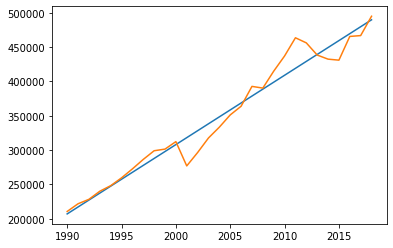

Modelo Original como previsão de 4 anos no futuro


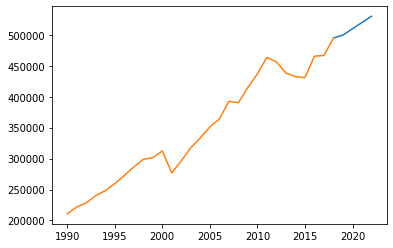

In [6]:
renew = br.loc[('Renewable sources')]
predict_data(renew,'Electricity output (GWh)')

### Predizendo produção de energias não-renovavel nos proximos 4 anos

Modelo Previsto de Electricity output (GWh) x Modelo Original


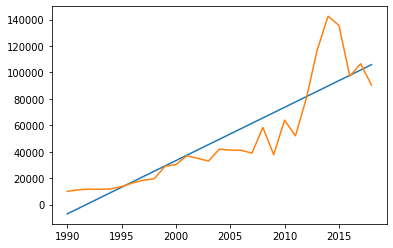

Modelo Original como previsão de 4 anos no futuro


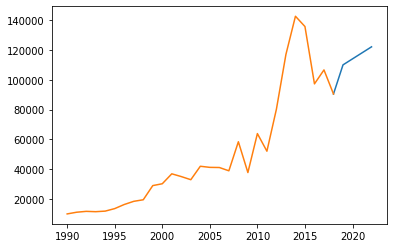

In [7]:
not_renew = br.loc[('Fossil fuels')]
predict_data(not_renew,'Electricity output (GWh)')

### Predizendo produção de energias nuclear nos proximos 4 anos

Modelo Previsto de Electricity output (GWh) x Modelo Original


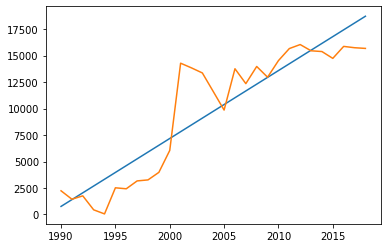

Modelo Original como previsão de 4 anos no futuro


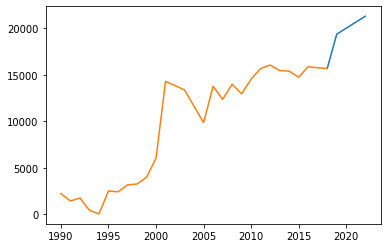

In [8]:
nuclear = br.loc[('Nuclear')]
predict_data(nuclear,'Electricity output (GWh)')

<AxesSubplot:>

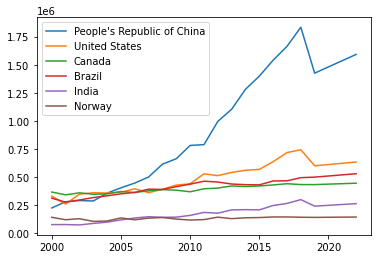

In [9]:
countries = [
"Australia",
"Austria",
"Belgium",
"Canada",
"Chile",
"Czech Republic",
"Denmark",
"Estonia",
"Finland",
"France",
"Germany",
"Greece",
"Hungary",
"Iceland",
"Ireland",
"Israel",
"Italy",
"Japan",
"Korea",
"Latvia",
"Lithuania",
"Luxembourg",
"Mexico",
"Netherlands",
"New Zealand",
"Norway",
"Poland",
"Portugal",
"Slovak Republic",
"Slovenia",
"Spain",
"Sweden",
"Switzerland",
"Turkey",
"United Kingdom",
"United States",
"Brazil",
"People's Republic of China",
"India",
"Indonesia",
"Morocco",
"Singapore",
"South Africa",
"Thailand"]

indexes = df_countries.transpose().index.to_list()
indexes.extend([2018,2019,2020,2021,2022])
all_countries = pd.DataFrame(index=indexes)
for i in countries:
    country = df_countries.loc[(i)]
    label = 'Electricity output (GWh)'
    renew = country.loc[('Renewable sources')]
    df = renew.transpose()
    lm = simply_train(df,label)
    predict, real = predict_future(lm,df,label)
    all_countries[i]=pd.concat([real,predict])


# plt.show()
best_countries =all_countries.sum().sort_values(ascending=False).head(6).index
all_countries[best_countries].loc[2000:].plot()